In [213]:
import math
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Function
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
# Derivative 6x - 4 = (6*3-4) = 14

In [5]:
f(3.0)

20.0

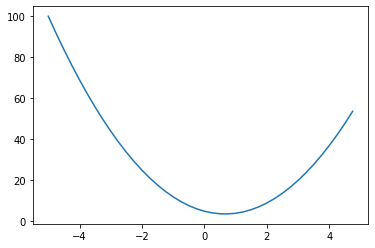

In [6]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plot(xs,ys)
show()

In [26]:
# Rise over run
h = 0.0000001 / normalize (run)
x = 3.0
(f(x+h) - f(x))/h # Slope

14.000000305713911

In [28]:
h = 0.000000001
x = -3.0
(f(x+h) - f(x))/h # Slope

-22.000001820288162

In [34]:
h = 0.00000001
x = 2/3 # Slope is zero
(f(x+h) - f(x))/h # Slope

0.0

In [48]:
# Little more complex three scalar inputs in expression graphs
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [50]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c
print('d1', d1)
print('d2,', d2)
print('Slope', (d2-d1)/h)

d1 4.0
d2, 4.0001
Slope 0.9999999999976694


## NN are mathematical expressions to represent them we need objects
### Value objects as data structures


# Value Object

In [253]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children) # empty tuple by default, prev (set)
        self._op = _op # operation a simple string
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None # Empty Function
    
    # Print out expressions
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other  if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
            
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad  += other.data*out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1-t**2)* out.grad
        out._backward = _backward
        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data*out.grad
            out._backward = _backward
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

# a = Value(2.0, label='a')
# b = Value(-3.0, label='b')
# c = Value(10.0, label='c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label='f')
# L = d*f; L.label='L'
# L

In [254]:
a = Value(2.0)
a*4

Value(data=8.0)

In [62]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [65]:
d._op

'+'

In [8]:
a+b

Value(data=-1.0)

In [9]:
a*b

Value(data=-6.0)

In [12]:
d = a*b+c
d

Value(data=4.0)

In [11]:
(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [13]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

## Visualize expression

In [38]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{%s | data=%.4f | grad=%.4f}"%(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


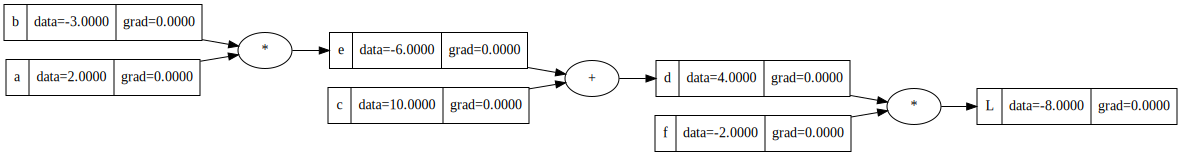

In [144]:
draw_dot(L)

### One step of optimization

In [78]:
#Leaf nodes (Nudging in positive direction of gradient)
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#Forward pass
e = a*b
d = e+c
L = d*f
 
print(L.data)

-7.286496


### Backpropagration require to go from output to input tracing back. (Recursive Chain Rule)


In [60]:
#e = a*b
#de/da = b
#de/db = a

#dL/db ?
#dL/da ?
#dL/de = -2.0

#dL/da = dL/de * de/da
#dL/db = dL/de * de/db

In [ ]:
L = d*f
#dL/dd = ? f

In [76]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
e.grad = -2.0
c.grad = -2.0
a.grad = -2.0*-3.0
b.grad = -2.0* 2.0

In [ ]:
#Important Node

In [ ]:
dL/dc ? 
#d = c + e
#dd/de = 1.0
#dd/dc = 1.0
#From Chain Rule
#dL/dc = dL/dd * dd/dc

In [43]:
#gating function
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data + h

    print((L2-L1)/h) # Rise/Run
    
lol()

1.000000000000334


  ## Two Input Neuron

In [189]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#Weights (Synaptic Strength)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#Bias of the neuron
b = Value(6.881373, label='b')
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1+ x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'
#Plot

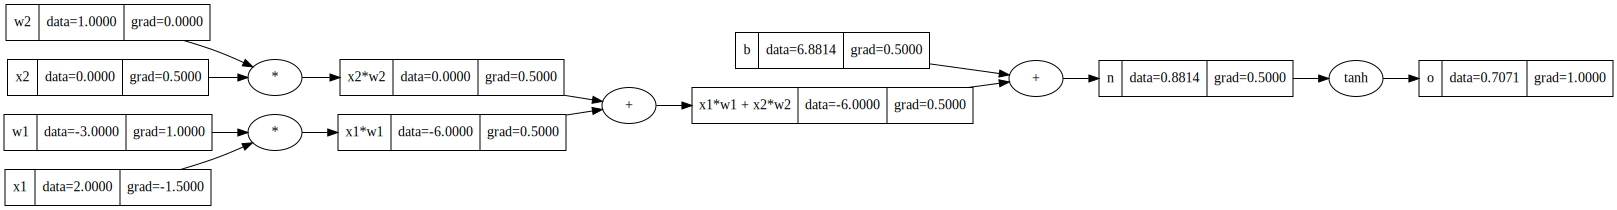

In [192]:
draw_dot(o)

In [191]:
##Backpropagation
o.backward()

In [148]:
o.grad = 1.0

In [124]:
o._backward()

In [126]:
n._backward()

In [128]:
b._backward()

In [130]:
x1w1x2w2._backward()

In [132]:
x2w2._backward()
x1w1._backward()

In [95]:
o.grad = 1.0

In [99]:
n.grad = 0.5

### + is just a distributor of gradient

In [101]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [103]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [105]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [107]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [97]:
o.data

0.7071064876766542

In [98]:
#do/dn
1 - o.data**2

0.5000004150855857

## Topological Sorting

In [141]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [140]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.881373),
 Value(data=0.7071064876766542)]

## Backprop Bug

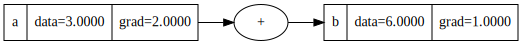

In [196]:
a = Value(3.0, label='a')
b = a+a; b.label='b'
b.backward()
draw_dot(b)

* Solve by accumulating it

## In pytorch API

In [203]:
import torch

x1 = torch.Tensor([2.0]).double();  x1.requires_grad = True
x2 = torch.Tensor([0.0]).double();  x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double();  w2.requires_grad = True
b = torch.Tensor([6.8813]).double();b.requires_grad = True
n = x1*w1+x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()

print('---')
print(x1.grad.item())
print(x2.grad.item())
print(w1.grad.item())
print(w2.grad.item())

0.7070699720278941
---
-1.5001561639694192
0.5000520546564731
1.0001041093129461
0.0


In [204]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [216]:
import random

## Building Neural Network

In [388]:
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self,x):
        # w*x + b
        #print(list(zip(self.w,x)))
        act = sum(list(wi*xi for wi, xi in zip(self.w, x)))+ self.b #+ self.b
        #print(act)
        out = act.tanh()
        #print(out)
        return out

class Layer:
    
    def __init__(self,nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) ==1 else outs
        
class MLP:
    
    def __init__(self,nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
        

        
x = [2.0, 3.0, -1.0] # 3D inputs
#n = Neuron(2)
#n = Layer(2,3)
n = MLP(3,[4,4,1])
n(x)

Value(data=0.9086385901294699)

In [389]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0, 1.0],
    [1.0,1.0,-1.0],
]
ys = [1.0, -1.0, -1.0, 1]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9086385901294699),
 Value(data=0.8122284092747788),
 Value(data=0.9365304007324551),
 Value(data=0.9102833061705279)]

In [397]:
#list((yout-ygt)**2  for ygt, yout in zip(ys, ypred))